In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['default'])

In [2]:
data = pd.read_csv('annotated_points_np_141.csv', header = [0])
data.head()

,x,y,labels
0,23.104839,20.064935,1.0
1,23.407258,22.500000,1.0
2,24.979839,21.120130,1.0
3,24.979839,19.090909,1.0
4,23.830645,18.279221,1.0


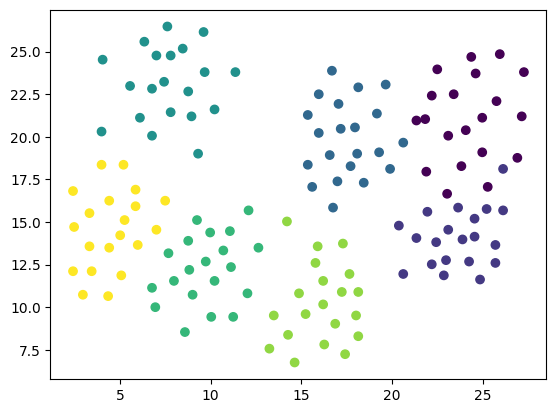

In [3]:
plt.scatter(data.x, data.y, c = data.labels)

In [4]:
class Node():
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, info_gain = None, value =None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value
class DecisionTreeClassifier():
    def __init__(self,min_sample_split, max_depth):
        self.root = None
        self.min_sample_split = min_sample_split
        self.max_depth = max_depth
    
    def build_tree(self,dataset, curr_depth = 0):
        X, Y = dataset[:,:-1] , dataset[:,-1]
        num_samples, num_features = np.shape(X)
        if num_samples >= self.min_sample_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset,num_samples, num_features)
            if best_split["info_gain"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree,best_split["info_gain"])
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value= leaf_value)
    
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")
        
        for feature_index in range(num_features):
            featue_values = dataset[:, feature_index]
            possible_thresholds = np.unique(featue_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) >0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:,-1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"]  = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split
    
    def split1(self, dataset,index, value):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        w_l = len(l_child) / len(parent)
        w_r = len(r_child) / len(parent)
        gain = self.gini_index(parent) - (w_l*self.gini_index(l_child) + w_r*self.gini_index(r_child))
        return gain
    
    def gini_index(self,y):
        c_lab = np.unique(y)
        gini = 0
        for cls in c_lab:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
    
    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key = Y.count)
    
    def fit(self, X, Y):
        dataset = np.concatenate((X,Y), axis = 1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        if tree.value != None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)
classifier = DecisionTreeClassifier(min_sample_split = 25, max_depth=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.896551724137931